## Part 1

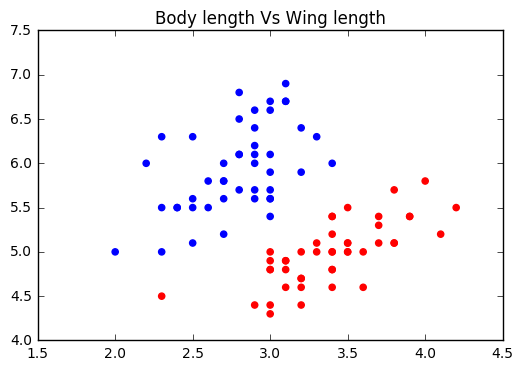

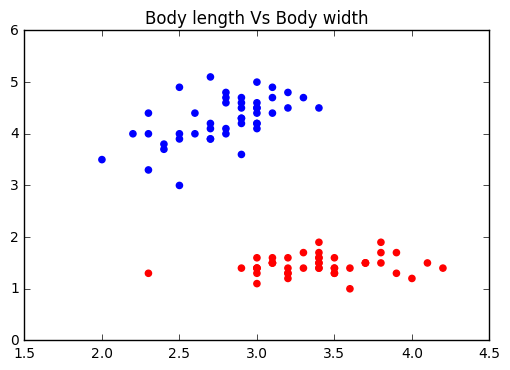

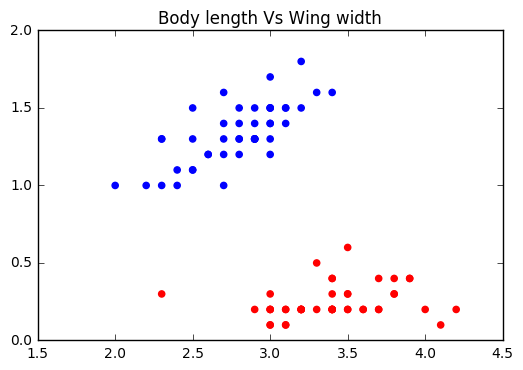

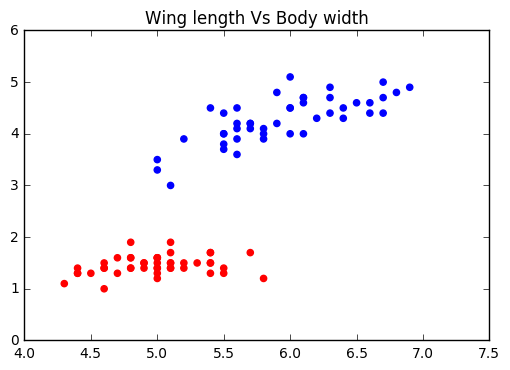

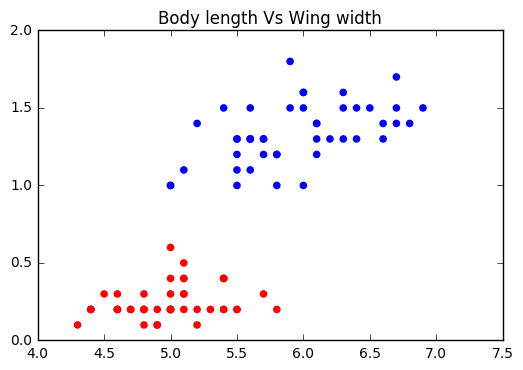

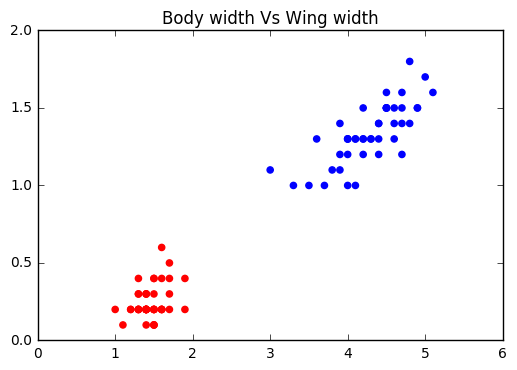

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Reading the dataset
rawData = pd.read_csv("owls+headers.csv")
rawData.columns=['body_length', 'wing_length', 'body_width', 'wing_width', 'type']

#Removing the unwanted class as per my name(Tushar)
data=rawData[rawData.type!= 'SnowyOwl']

#Scatter plots
colorToType = { 'LongEaredOwl':'red', 'BarnOwl':'blue'}

#bodyLength_vs_wingLength
plt.figure(1)
plt.scatter( data['body_length'], data['wing_length'], color=[ colorToType[i] for i in data['type'] ] )
plt.title('Body length Vs Wing length')

#bodyLength_vs_bodyWidth
plt.figure(2)
plt.scatter( data['body_length'], data['body_width'], color=[ colorToType[i] for i in data['type'] ] )
plt.title('Body length Vs Body width')

#bodyLength_vs_wingWidth
plt.figure(3)
plt.scatter( data['body_length'], data['wing_width'], color=[ colorToType[i] for i in data['type'] ] )
plt.title('Body length Vs Wing width')

#wingLength_vs_bodyWidth
plt.figure(4)
plt.scatter( data['wing_length'], data['body_width'], color=[ colorToType[i] for i in data['type'] ] )
plt.title('Wing length Vs Body width')

#wingLength_vs_wingWidth
plt.figure(5)
plt.scatter( data['wing_length'], data['wing_width'], color=[ colorToType[i] for i in data['type'] ] )
plt.title('Body length Vs Wing width')

#bodyWidth_vs_wingWidth
plt.figure(6)
plt.scatter( data['body_width'], data['wing_width'], color=[ colorToType[i] for i in data['type'] ] )
plt.title('Body width Vs Wing width')


## Comment

Almost all the plots show clear distinction between both the types.

## Part 2

## Testing the accuracy of my Algorithm Implementation

Accuracy :  0.9333333333333333


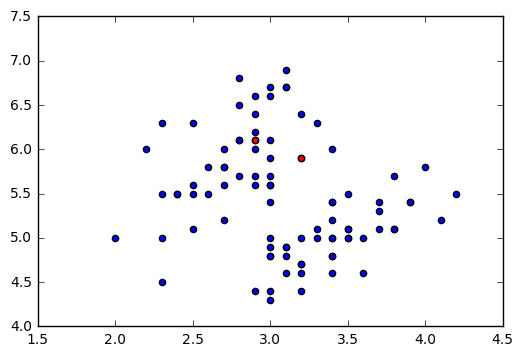

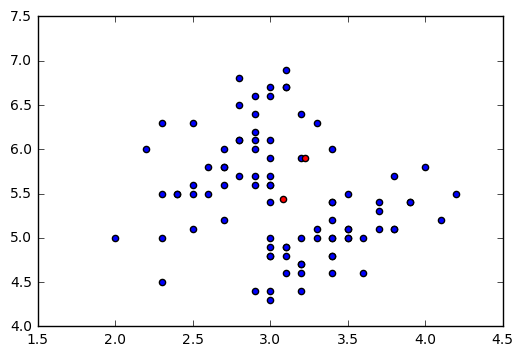

In [23]:
# Selecting top 2 rows and assigning them as centroids
def init_centroids(data, k):
    centroids = data.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

# Array of points with nearest centroid for each point
def closest_centroid(data, centroids):
    distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

#  Calculate new centroids with points closest to them
def shift_centroids(data, closest, centroids):
    return np.array([data[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

# Calculating the Accuracy for implementation
def accuracyCalculator(actualData, predictedClusters):
    count=0    
    actualClassLabels=np.asarray(actualData.type)
    actualClassLabels[actualClassLabels=="BarnOwl"]=0
    actualClassLabels[actualClassLabels=="LongEaredOwl"]=1
    for i in range(0,len(actualClassLabels)):
        if(actualClassLabels[i]==predictedClusters[i]):
            count=count+1
        #print("For i=",i," Actual Label Vs Predicted Label :",actualClassLabels[i], " ", predictedClusters[i])
    return (count/len(actualClassLabels))


rawData = pd.read_csv("owls+headers.csv")
rawData.columns=['body_length', 'wing_length', 'body_width', 'wing_width', 'type']
rawData=rawData.reset_index(drop=True)

rawData=rawData[rawData.type!= 'SnowyOwl']

data=rawData[['body_length', 'wing_length', 'body_width', 'wing_width']].as_matrix()

# Initial Scatter plot with random centroids
# Selecting body_length and wing_length for scatter plot as they are the most distinguishing attributes
centroids = init_centroids(data, 2)
plt.figure(1)
plt.scatter(data[:, 0], data[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], c='r')

# Final Scatter plot with proper centroids
closestClass = closest_centroid(data, centroids)
centroids = shift_centroids(data, closestClass, centroids)
plt.figure(2)
plt.scatter(data[:, 0], data[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], c='r')


predictedClusters = closest_centroid(data, centroids)
print('Accuracy : ',accuracyCalculator(rawData, predictedClusters))

## Comment on Accuracy
The accuracy is almost everytime above 95% and the scatter plots show clear division between the types of owls. The accuracy of can be increased though by applying z-normalization to each of the attributes and reapplying the algorithm.  


## Part 4 
## Testing the Accuracy with Scikit-Learn KMeans

Accuracy is : 1.0


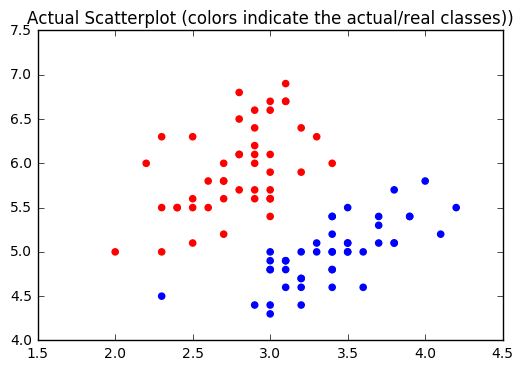

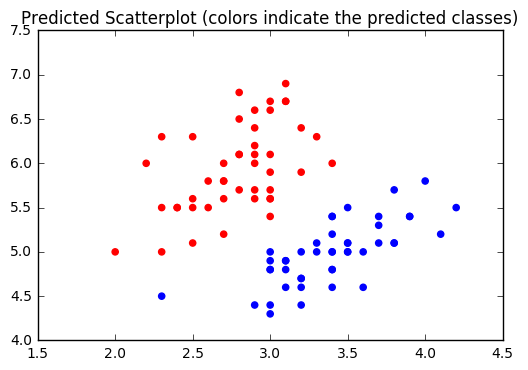

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
import sklearn.metrics as sm

dataKmeans = pd.read_csv("owls+headers.csv")
dataKmeans.columns=['body_length', 'wing_length', 'body_width', 'wing_width', 'type']
dataKmeans=dataKmeans[dataKmeans.type!= 'SnowyOwl']

# Running the data on K-means algorithm

responseVar=pd.DataFrame(dataKmeans.type)
responseVar=responseVar.reset_index(drop=True)

responseVar[responseVar=='BarnOwl'],responseVar[responseVar=='LongEaredOwl']=0,1
responseVar=responseVar.astype(np.int64)

del dataKmeans['type']
predictorVars=dataKmeans

# K-means model with 2 Clusters
model = KMeans(n_clusters=2)
model.fit(predictorVars)
 
# The scatter plot of body length Vs wing length with actual classes
plt.figure(1)
c = { int(0):'red', int(1):'blue'}
plt.scatter(predictorVars.body_length, predictorVars.wing_length, color=[c[i] for i in responseVar['type']])
plt.title('Actual Scatterplot (colors indicate the actual/real classes))')

predictedResponse = np.choose(model.labels_, [1,0]).astype(np.int64)

# The scatter plot of body length Vs wing length with predicted classes
plt.figure(2)
colormap = np.array(['red', 'blue'])
plt.scatter(predictorVars.body_length, predictorVars.wing_length, color=colormap[predictedResponse])
plt.title('Predicted Scatterplot (colors indicate the predicted classes)')

# Performance Metrics
print("Accuracy is :",sm.accuracy_score(responseVar, predictedResponse))

## Comment
The accuracy for K-means classification is 100%. This is also evident from the above plots which are exactly same to each other.